In [1]:
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
baseline_data = pd.read_csv('C:/Users/pc/Desktop/phase_2_project/dsc-phase-2-project/data/kc_house_data_new.csv')

In [3]:
baseline_data.head(15)

,price,month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,10,3,1.00,1180,5650,1.0,0,2,Average,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000,12,3,2.25,2570,7242,2.0,0,2,Average,7 Average,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000,2,2,1.00,770,10000,1.0,0,2,Average,6 Low Average,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000,12,4,3.00,1960,5000,1.0,0,2,Very Good,7 Average,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000,2,3,2.00,1680,8080,1.0,0,2,Average,8 Good,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000,5,4,4.50,5420,101930,1.0,0,2,Average,11 Excellent,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930
6,257500,6,3,2.25,1715,6819,2.0,0,2,Average,7 Average,1715,0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,291850,1,3,1.50,1060,9711,1.0,0,2,Average,7 Average,1060,0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,229500,4,3,1.00,1780,7470,1.0,0,2,Average,7 Average,1050,730,1960,0.0,98146,47.5123,-122.337,1780,8113
9,323000,3,3,2.50,1890,6560,2.0,0,2,Average,7 Average,1890,0,2003,0.0,98038,47.3684,-122.031,2390,7570


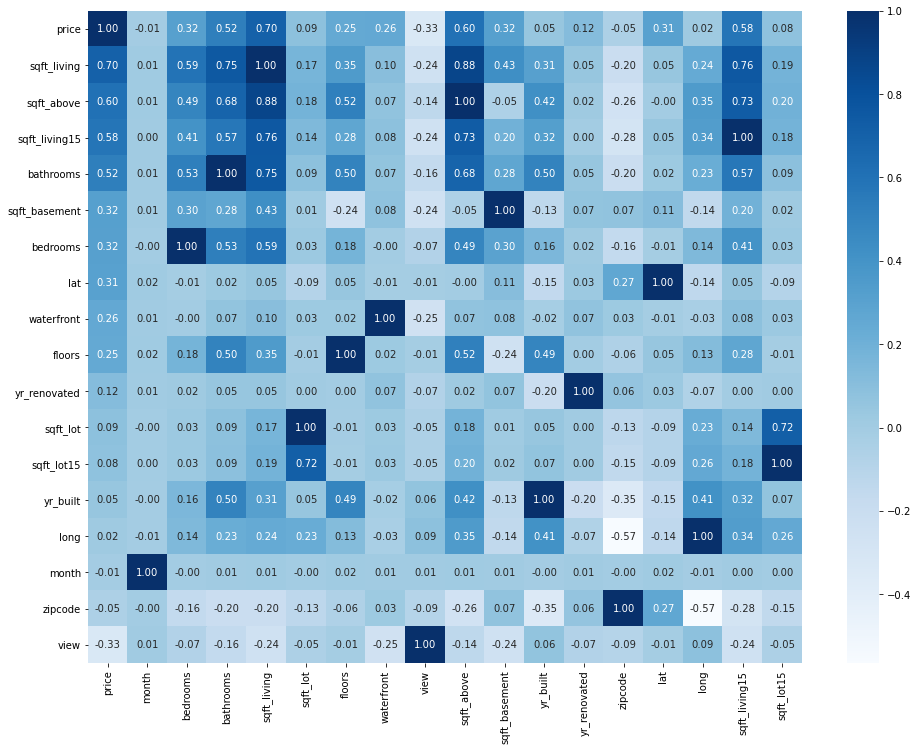

In [4]:
correlation_of_variables = baseline_data.corr()
correlation_of_variables = correlation_of_variables.sort_values(by='price', ascending=False)
#mask = np.triu(np.ones_like(correlation_of_variables, dtype=np.bool))
fig1, ax1 = plt.subplots(figsize=(16, 12))
sns.heatmap(correlation_of_variables, annot=True, annot_kws={'size':10}, fmt='.2f', ax=ax1, cmap='Blues');

In [5]:
target_variable = 'price'
input_variables = baseline_data.drop('price', axis=1).columns
formula = target_variable + '~' + '+'.join(input_variables)

In [6]:
baseline_model = ols(formula=formula, data=baseline_data).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1888.
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:11:12   Log-Likelihood:            -2.8999e+05
No. Observations:               21345   AIC:                         5.800e+05
Df Residuals:                   21314   BIC:                         5.803e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               7.592e+06   2.84e+06      2.673      0.008    2.02e+06    1.32e+07
condition[T.Fair]      -7944.9854   1.56e+04     -0.509      0.611   -3.85e+04    2.27e+04
condition[T.Good]        3.03e+04   3360.951      9.016      0.000    2.37e+04    3.69e+04
condition[T.Poor]      -6.501e+04   3.74e+04     -1.739      0.082   -1.38e+05    8250.055
condition[T.Very Good]  7.311e+04   5367.153     13.622      0.000    6.26e+04    8.36e+04
grade[T.11 Excellent]   2.474e+05   1.15e+04     21.502      0.000    2.25e+05     2.7e+05
grade[T.12 Luxury]      7.217e+05    2.2e+04     32.813      0.000    6.79e+05    7.65e+05
grade[T.13 Mansion]     1.911e+06   5.48e+04     34.895      0.000     1.8e+06    2.02e+06
grade[T.4 Low]         -4.231e+05   5.24e+04     -8.068      0.000   -5.26e+05    -3.2e+05
grade[T.5 Fair]        -4.109e+05   1.61e+04    -25.445      0.000   -4.43e+05   -3.79e+05
grade[T.6 Low Average] -3.829e+05   9966.745    -38.417      0.000   -4.02e+05   -3.63e+05
grade[T.7 Average]     -3.454e+05   8188.050    -42.186      0.000   -3.61e+05   -3.29e+05
grade[T.8 Good]        -2.864e+05   7342.943    -39.006      0.000   -3.01e+05   -2.72e+05
grade[T.9 Better]      -1.641e+05   7106.790    -23.087      0.000   -1.78e+05    -1.5e+05
month                  -2885.6835    423.101     -6.820      0.000   -3714.993   -2056.374
bedrooms               -2.348e+04   1955.067    -12.012      0.000   -2.73e+04   -1.97e+04
bathrooms                 4.5e+04   3168.448     14.202      0.000    3.88e+04    5.12e+04
sqft_living               99.9244     17.328      5.767      0.000      65.961     133.888
sqft_lot                   0.1287      0.046      2.802      0.005       0.039       0.219
floors                  2.729e+04   3513.778      7.766      0.000    2.04e+04    3.42e+04
waterfront              6.209e+05   1.61e+04     38.606      0.000    5.89e+05    6.52e+05
view                   -3.819e+04   1834.140    -20.820      0.000   -4.18e+04   -3.46e+04
sqft_above                34.2620     17.335      1.976      0.048       0.284      68.240
sqft_basement             39.3268     17.160      2.292      0.022       5.692      72.962
yr_built               -2222.8824     70.880    -31.361      0.000   -2361.813   -2083.952
yr_renovated              36.3654      3.843      9.464      0.000      28.834      43.897
zipcode                 -592.4776     31.945    -18.547      0.000    -655.093    -529.863
lat                     6.102e+05   1.03e+04     59.041      0.000     5.9e+05     6.3e+05
long                   -2.157e+05   1.27e+04    -16.947      0.000   -2.41e+05   -1.91e+05
sqft_living15             30.6181      3.340      9.167      0.000      24.072      37.165
sqft_lot15                -0.3730      0.070     -5.301      0.000      -0.511  

<div class="alert alert-block alert-info">
<b><font color="black">Evaluation</font></b>
</div>

- 
- 
- 

 #### Assumption of Normality<br>&emsp;(for Baseline_Model)

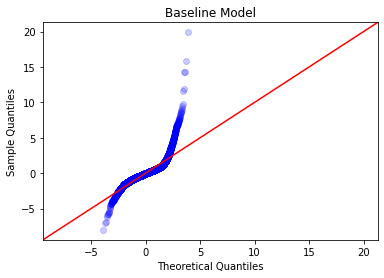

In [7]:
residuals = baseline_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, fit=True, line='45', alpha=0.2)
plt.title('Baseline Model', size=12);

#### Assumption of Homoscedasticity<br>&emsp;(for Baseline_Model)

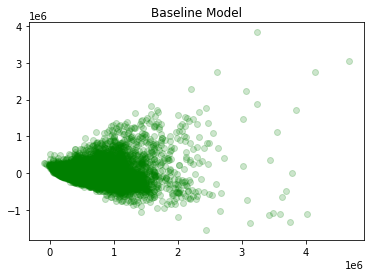

In [8]:
fig1,ax1 = plt.subplots()
ax1.scatter(x=baseline_model.predict(), y=residuals, color='green', alpha=0.2)
plt.title('Baseline Model', size=12);